<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/3/3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(seed=0)
X_0 = np.random.multivariate_normal( [2,2],  [[2,0],[0,2]],  50 )
y_0 = np.zeros(len(X_0))
 
X_1 = np.random.multivariate_normal( [6,7],  [[3,0],[0,3]],  50 )
y_1 = np.ones(len(X_1))
 
X = np.vstack((X_0, X_1))
y = np.append(y_0, y_1)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 
# 特徴データを標準化(平均 0、標準偏差 1)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

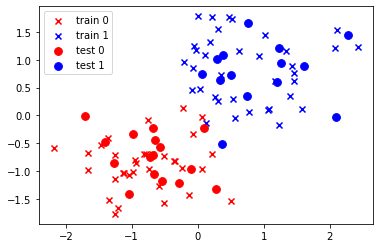

In [3]:
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')
 
plt.legend(loc='upper left')
plt.show()

In [4]:
# 訓練
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# テストデータ 30個を分類
print (lr.predict(X_test_std))
 
# 精度を確認
print (lr.score(X_test_std, y_test))

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1.]
0.9666666666666667


In [6]:
print (lr.intercept_)
print (lr.coef_)
 
w_0 = lr.intercept_[0]
w_1 = lr.coef_[0,0]
w_2 = lr.coef_[0,1]
print(w_0, w_1, w_2)

[0.16354077]
[[1.81741397 2.27035468]]
0.1635407692957372 1.8174139668075775 2.270354678981028


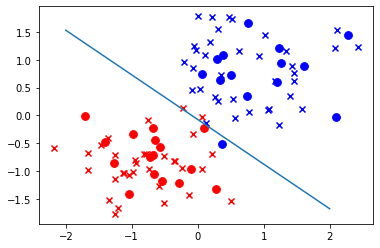

In [7]:
# 境界線 プロット
plt.plot([-2,2], list(map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2])))
 
# データを重ねる
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')
plt.show()